# 🎯 AI Resume–Job Matcher using NLP & Data Analytics

This project uses Natural Language Processing (NLP) and Machine Learning techniques to:
- Extract key skills from job descriptions and candidate resumes
- Calculate a match score for each candidate–job pair
- Visualize best job matches and missing skills


In [1]:
#Load the libraries
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

In [2]:
# Load job descriptions
jobs_df = pd.read_csv(r'C:\Users\USER\Desktop\jupyter\Projects\AI_RESUMEMATCHER\job_description.csv')
print("JOB DESCRIPTIONS:")
print(jobs_df[['Job_Title', 'Job_Description']], '\n')

# Load resumes
resumes_df = pd.read_csv(r'C:\Users\USER\Desktop\jupyter\Projects\AI_RESUMEMATCHER\resumes.csv')
print("RESUMES:")
print(resumes_df[['Name', 'Resume_Text']])


JOB DESCRIPTIONS:
                   Job_Title  \
0               Data Analyst   
1  Machine Learning Engineer   
2             Data Scientist   

                                     Job_Description  
0  We are looking for a Data Analyst with experie...  
1  The role requires expertise in Python, data pr...  
2                                                NaN   

RESUMES:
     Name                                        Resume_Text
0  Ayesha  Skilled in SQL, Python, data visualization wit...
1    Ravi  Experience in TensorFlow, Python, Scikit-learn...
2    Neha  Knowledge of Python, matplotlib, pandas, and d...


In [3]:
!pip install spacy
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 5.1 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 4.7 MB/s eta 0:00:03
     -------- ------------------------------- 2.6/12.8 MB 4.3 MB/s eta 0:00:03
     --------- ------------------------------ 3.1/12.8 MB 3.6 MB/s eta 0:00:03
     ------------- -------------------------- 4.2/12.8 MB 4.1 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 4.0 MB/s eta 0:00:02
     ------------------- -------------------- 6.3/12.8 MB 3.9 MB/s eta 0:00:02
     ---------------------- ----------------- 7.1/12.8 MB 3.9 MB/s eta 0:00:02
     ------------------------- -------------- 8.1/12.8 MB 3.8 MB/s eta 0:00:02
     --------------------------- ------------ 8.9/12.8 MB 3.8 MB/s eta 0:00:02
     ------------------------------ --------- 9.7/12.8 MB 3.


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Function to extract skills from job descriptions
def extract_keywords(text):
    if pd.isna(text):
        return []
    doc = nlp(str(text))
    keywords = [token.text.lower() for token in doc if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'VERB']]
    return list(set(keywords))  # Remove duplicates

# Apply to jobs
jobs_df['Extracted_Skills'] = jobs_df['Job_Description'].apply(extract_keywords)

# Function to extract skills from resumes
def extract_resume_keywords(text):
    if pd.isna(text):
        return []
    doc = nlp(str(text))
    keywords = [token.text.lower() for token in doc if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'VERB']]
    return list(set(keywords))

# Apply to resumes
resumes_df['Extracted_Skills'] = resumes_df['Resume_Text'].apply(extract_resume_keywords)


In [5]:
# Function to compute match score
def match_score(resume_skills, job_skills):
    if not resume_skills or not job_skills:
        return 0
    common = set(resume_skills).intersection(set(job_skills))
    return round((len(common) / len(set(job_skills))) * 100)


In [8]:
def missing_skills(resume_skills, job_skills):
    return list(set(job_skills) - set(resume_skills))
if score > best_score:
    best_score = score
    best_match = job['Job_Title']
    missing = missing_skills(resume['Extracted_Skills'], job['Extracted_Skills'])
print(f"🧠 Skills to Learn for {best_match}: {missing}")

NameError: name 'missing' is not defined

In [6]:
for index, resume in resumes_df.iterrows():
    print(f"\n🔍 Candidate: {resume['Name']}")
    best_match = None
    best_score = 0

    for _, job in jobs_df.iterrows():
        score = match_score(resume['Extracted_Skills'], job['Extracted_Skills'])
        print(f"  📌 {job['Job_Title']} → Match Score: {score}%")

        if score > best_score:
         best_score = score
         best_match = job['Job_Title']
         missing = missing_skills(resume['Extracted_Skills'], job['Extracted_Skills'])

    print(f"✅ Best Match: {best_match} ({best_score}%)")
    print(f"🧠 Skills to Learn for {best_match}: {missing}")
    print("-" * 50)



🔍 Candidate: Ayesha
  📌 Data Analyst → Match Score: 31%


NameError: name 'missing_skills' is not defined

In [43]:
!pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create empty results list
results = []

for _, resume in resumes_df.iterrows():
    for _, job in jobs_df.iterrows():
        score = match_score(resume['Extracted_Skills'], job['Extracted_Skills'])
        results.append({
            'Candidate': resume['Name'],
            'Job': job['Job_Title'],
            'Match_Score': score
        })

# Convert to DataFrame
match_df = pd.DataFrame(results)
match_df


,Candidate,Job,Match_Score
0,Ayesha,Data Analyst,31
1,Ayesha,Machine Learning Engineer,18
2,Ayesha,Data Scientist,17
3,Ravi,Data Analyst,15
4,Ravi,Machine Learning Engineer,18
5,Ravi,Data Scientist,26
6,Neha,Data Analyst,23
7,Neha,Machine Learning Engineer,18
8,Neha,Data Scientist,13


In [50]:
# Rebuild match_df after updating skills
results = []

for _, resume in resumes_df.iterrows():
    for _, job in jobs_df.iterrows():
        score = match_score(resume['Extracted_Skills'], job['Extracted_Skills'])
        results.append({
            'Candidate': resume['Name'],
            'Job': job['Job_Title'],
            'Match_Score': score
        })

match_df = pd.DataFrame(results)



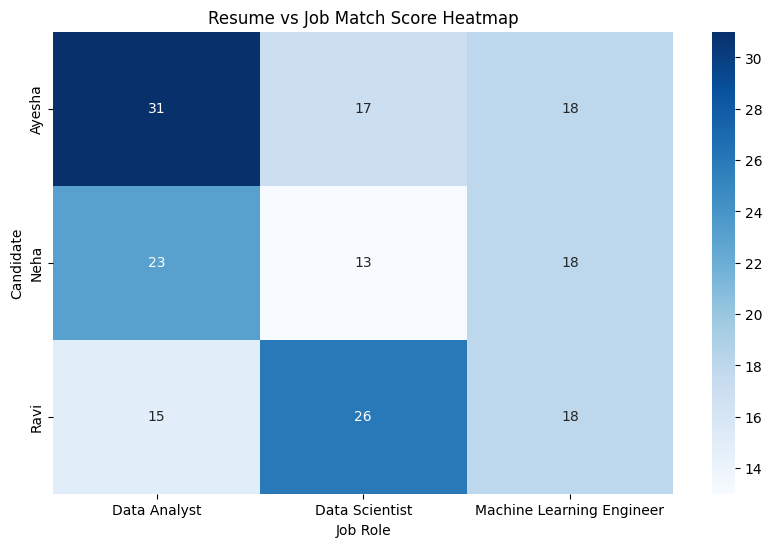

In [51]:
pivot_table = match_df.pivot(index='Candidate', columns='Job', values='Match_Score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title("Resume vs Job Match Score Heatmap")
plt.ylabel("Candidate")
plt.xlabel("Job Role")
plt.show()

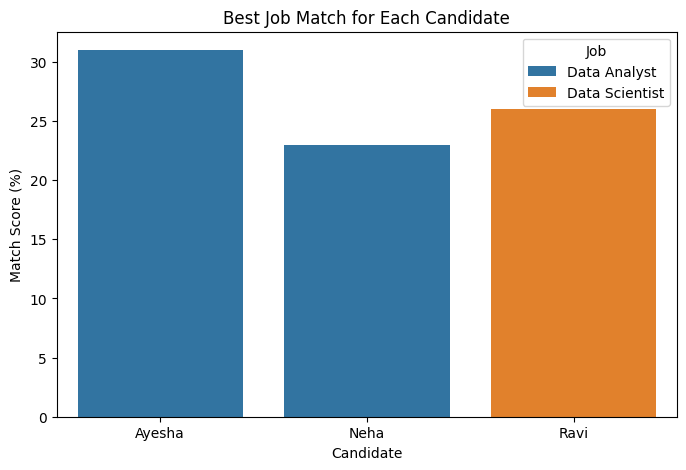

In [52]:
best_matches = match_df.loc[match_df.groupby('Candidate')['Match_Score'].idxmax()]

plt.figure(figsize=(8, 5))
sns.barplot(data=best_matches, x='Candidate', y='Match_Score', hue='Job')
plt.title("Best Job Match for Each Candidate")
plt.ylabel("Match Score (%)")
plt.show()


In [55]:
# Find the best match per candidate
best_matches = match_df.loc[match_df.groupby('Candidate')['Match_Score'].idxmax()]
best_matches.reset_index(drop=True, inplace=True)
best_matches


,Candidate,Job,Match_Score
0,Ayesha,Data Analyst,31
1,Neha,Data Analyst,23
2,Ravi,Data Scientist,26


C:\Users\USER\AppData\Local\Temp\ipykernel_17804\3317392289.py:11: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


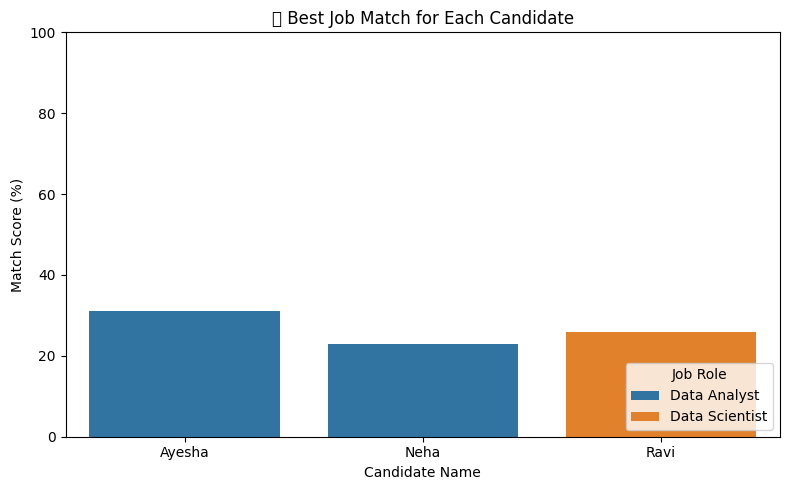

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=best_matches, x='Candidate', y='Match_Score', hue='Job')
plt.title("🎯 Best Job Match for Each Candidate")
plt.ylabel("Match Score (%)")
plt.xlabel("Candidate Name")
plt.ylim(0, 100)
plt.legend(title="Job Role", loc='lower right')
plt.tight_layout()
plt.show()
